In [1]:
# 3. Import libraries and modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)  # for reproducibility
import os
import matplotlib
from PIL import Image

import keras
print keras.__version__

from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import theano
import scipy as sp
from matplotlib import gridspec
from sklearn.decomposition import PCA
#from keras.datasets import mnist

Using Theano backend.


1.0.8


Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/site-packages/Theano-0.8.2-py2.7.egg/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
print 'hi'

hi


(1283, 1283)


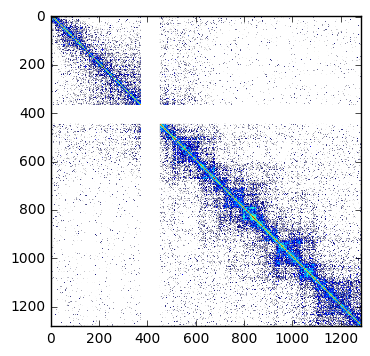

In [6]:
img = np.log2(np.loadtxt("GM12878_chr21_region6_DEL_Raw.txt"))
print img.shape
plt.imshow(img)

In [4]:
import numpy as np
from sklearn.decomposition import PCA

X = np.loadtxt("GM12878_chr21_region6_DEL_Raw.txt")
pca = PCA(n_components=100)
pca.fit(X)
#pca = PCA()

#print sum(sum(X==np.inf))
#X_transformed = pca.fit_transform(img)

# We center the data and compute the sample covariance matrix.
#X_centered = X - np.mean(X, axis=0)
#cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
#eigenvalues = pca.explained_variance_
#for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
#    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
#    print(eigenvalue)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

[ 526.83965827  380.8202913   308.20030574  294.23414759  251.19779003
  231.10363575  222.64518173  216.77736894  193.84725891  187.63610915
  176.53005335  172.61490918  165.48581821  158.88968433  140.98238756
  137.50674211  134.11244785  133.48303681  132.63326647  129.63605979
  127.03136561  125.71691539  124.13248058  123.43762323  115.72945016
  115.09173455  114.3862522   112.71743534  111.37971114  107.82065794
  104.70071086  103.10662727  100.37029972  100.2815898    97.98084411
   97.29719956   96.16215027   94.70729492   94.01665397   93.71987612
   90.15761973   88.86641312   87.70501924   87.03369826   86.72071806
   86.25185786   85.83169371   85.47333276   83.23434599   81.12148369
   79.28493218   78.49493337   77.98009656   77.74662799   77.22428434
   74.58066691   74.07239933   73.68759009   73.32083915   72.90514066
   72.31540983   71.73191925   70.77700785   70.7115518    70.13773734
   69.23592405   68.81599006   68.25984658   67.43994602   66.80701716
   66.

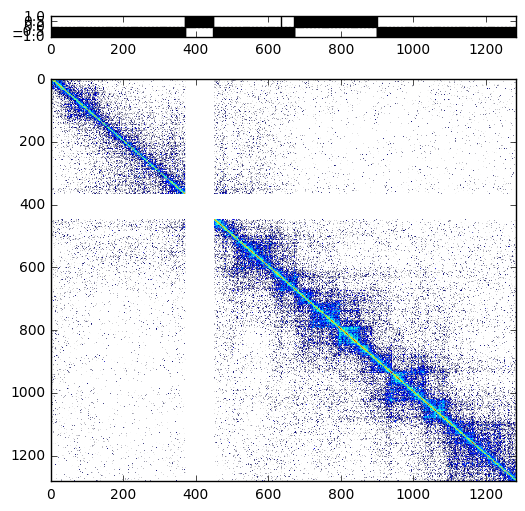

In [7]:
from matplotlib import gridspec

fig = plt.figure(figsize=(6, 6))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>=0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img, aspect='auto')
#fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
#axes.flat[0].bar(range(len(graph)),graph)
#axes.flat[1].imshow(img, aspect='equal')

[ 529.33099993]
[[  3.11212500e-19   2.11769139e-03   2.83649480e-03 ...,   3.07874670e-03
    3.76918141e-03   1.70593447e-03]] 1283


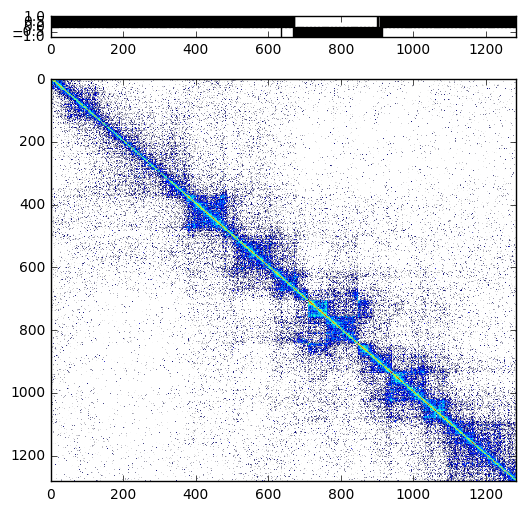

In [6]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import gridspec

X = np.loadtxt("GM12878_chr21_region6_INV_Raw.txt")
img = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img, aspect='auto')

[ 652.76329712]
[[  2.97608904e-19   3.15231744e-03   3.01996486e-03 ...,   3.22533043e-04
    1.04192902e-04   3.15303148e-04]] 1449


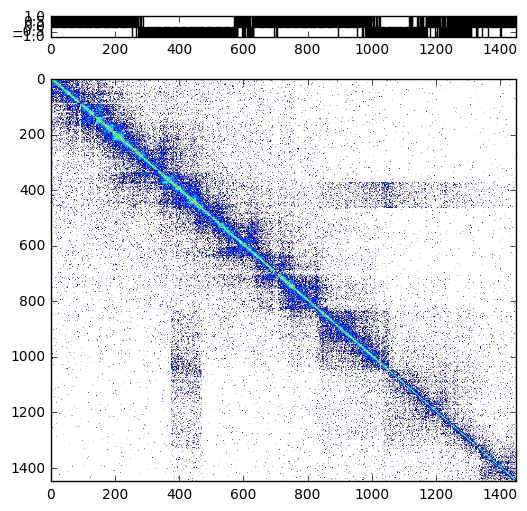

In [8]:
X = np.loadtxt("../size1500_matrix_for_eigen/GM12878_chr11_region1_INS_Raw.txt")
img = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img, aspect='auto')

<Container object of 1449 artists>

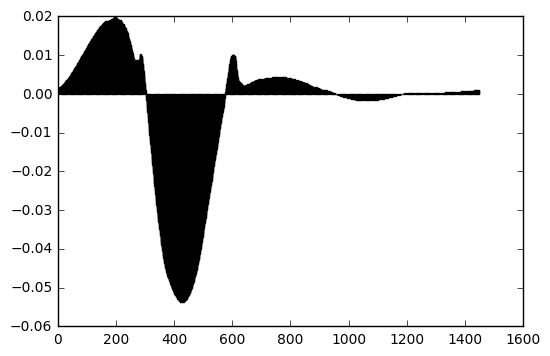

In [37]:
plt.bar(range(len(pca.components_[0])), savgol_filter(pca.components_[0], 331, 3))

/usr/local/lib64/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<Container object of 1449 artists>

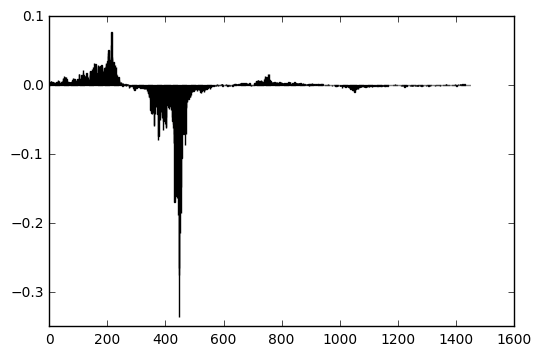

In [42]:
from sklearn.preprocessing import normalize
plt.bar(range(len(pca.components_[0])), normalize(pca.components_[0])[0])
#normalize(pca.components_[0]).shape

<Container object of 1449 artists>

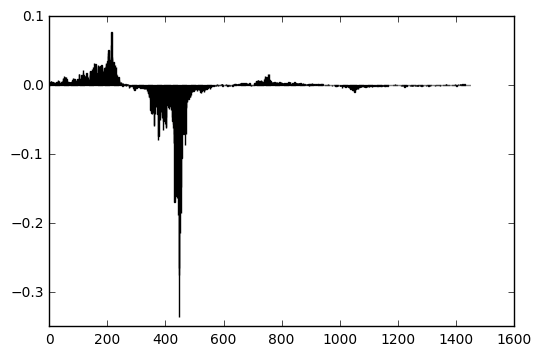

In [10]:
plt.bar(range(len(pca.components_[0])), pca.components_[0])

<Container object of 1449 artists>

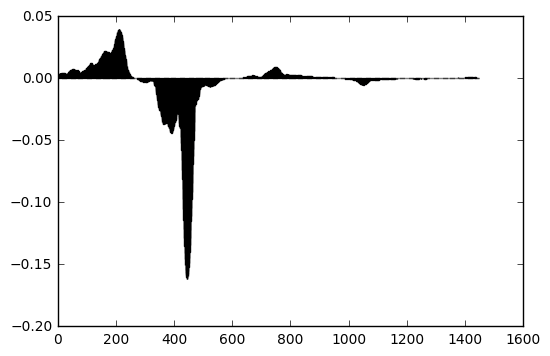

In [22]:
from scipy.signal import savgol_filter
plt.bar(range(len(pca.components_[0])), savgol_filter(pca.components_[0], 51, 3))

In [34]:
#a = savgol_filter(pca.components_[0], len(pca.components_[0]), 3)
a = pca.components_[0]
asign = np.sign(a)
signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
print sum(signchange)

162


<Container object of 1449 artists>

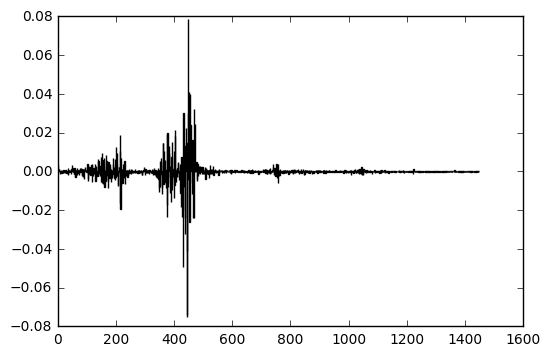

In [13]:
plt.bar(range(len(pca.components_[0])), np.gradient(pca.components_[0]))

[ 681.38333057]
[[ -3.19291786e-19  -3.06738373e-03  -2.94251655e-03 ...,  -6.83380366e-04
   -1.91093013e-04  -3.42775843e-04]] 1449


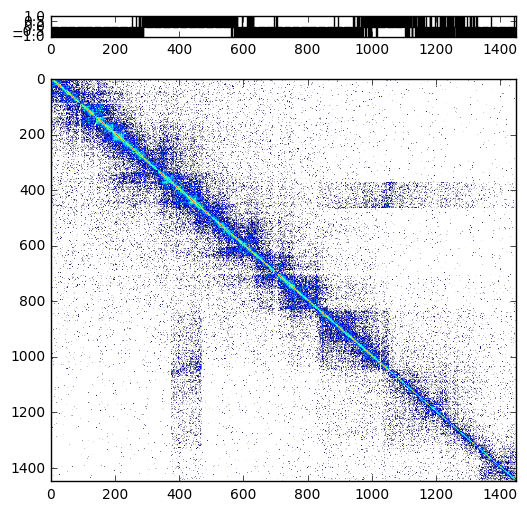

In [8]:
X = np.loadtxt("../size1500_matrix_for_eigen/GM12878_chr11_region1_INSINV_Raw.txt")
img = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img, aspect='auto')

[ 1219.18427353]
[[  6.03875904e-19   2.15953620e-03   2.11357202e-03 ...,   1.31933237e-03
    3.56961004e-04   5.16387480e-04]] 1386


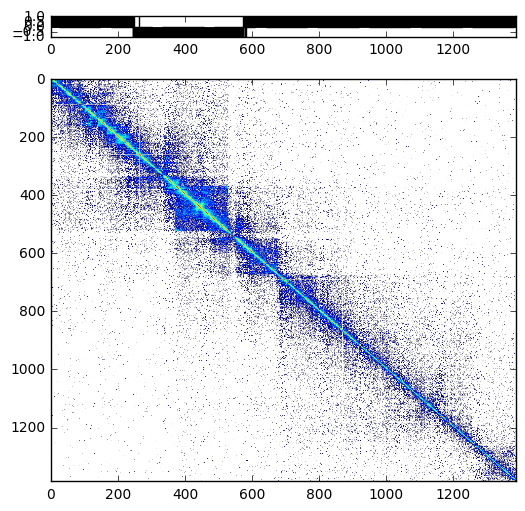

In [10]:
X = np.loadtxt("../size1500_matrix_for_eigen/GM12878_chr11_region1_DUP_Raw.txt")
img = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img, aspect='auto')

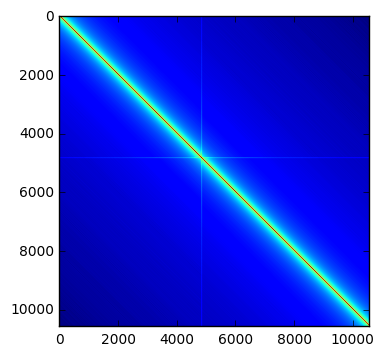

In [2]:
expected = np.log2(np.loadtxt("../largeMatrices/GM12878_largeRegions_chr1_region0_DUP_Expected.txt"))
plt.imshow(expected)

In [2]:
X = np.loadtxt("../largeMatrices/GM12878_largeRegions_chr1_region0_DUP_Raw.txt")
large = np.log2(X)

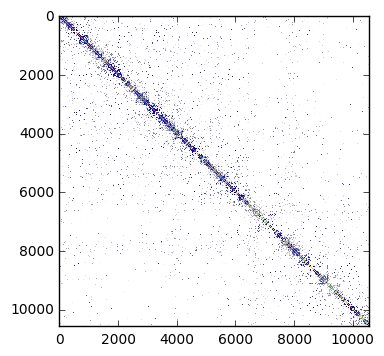

In [9]:
plt.imshow(large)

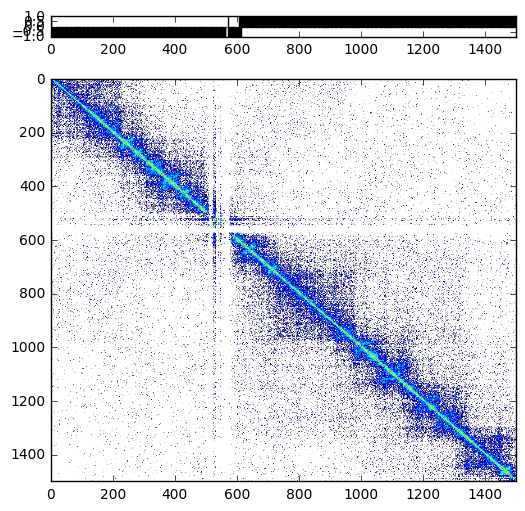

In [16]:
start = 0
end = 1500
img_chunk = large[start:end, start:end ]
pca = PCA(n_components=1)
pca.fit(X[start:end, start:end])
#print pca.explained_variance_
#print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img_chunk, aspect='auto')

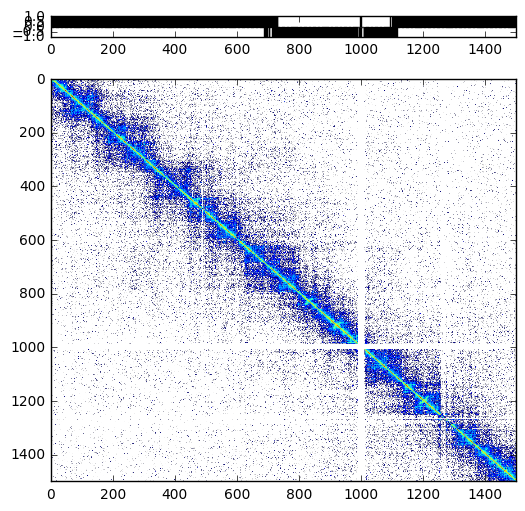

In [15]:
start = 1000
end = 2500
img_chunk = large[start:end, start:end ]
pca = PCA(n_components=1)
pca.fit(X[start:end, start:end])
#print pca.explained_variance_
#print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img_chunk, aspect='auto')

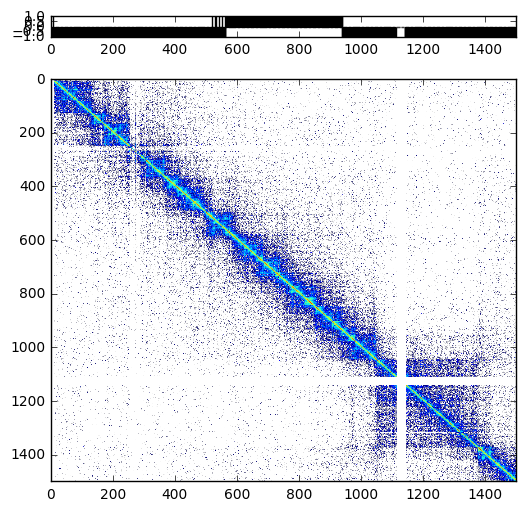

In [17]:
start = 2000
end = 3500
img_chunk = large[start:end, start:end ]
pca = PCA(n_components=1)
pca.fit(X[start:end, start:end])
#print pca.explained_variance_
#print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img_chunk, aspect='auto')

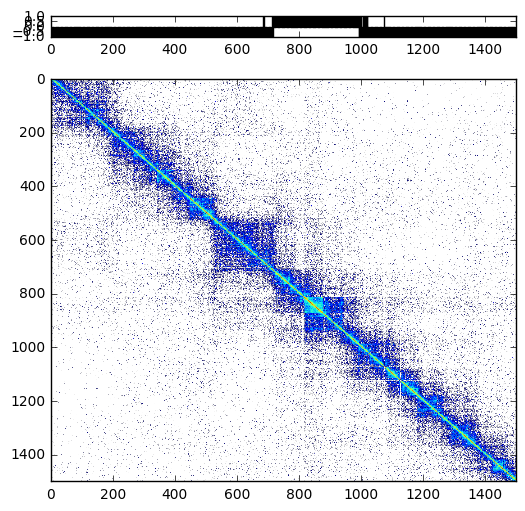

In [18]:
start = 4000
end = 5500
img_chunk = large[start:end, start:end ]
pca = PCA(n_components=1)
pca.fit(X[start:end, start:end])
#print pca.explained_variance_
#print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img_chunk, aspect='auto')

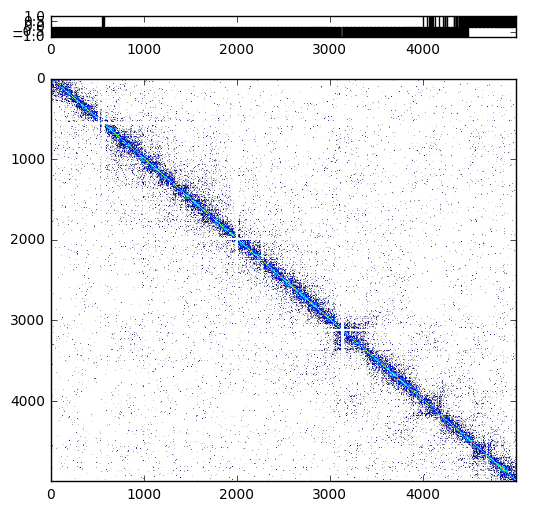

In [19]:
start = 0
end = 5000
img_chunk = large[start:end, start:end ]
pca = PCA(n_components=1)
pca.fit(X[start:end, start:end])
#print pca.explained_variance_
#print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img_chunk, aspect='auto')

(0, 1500)
(1000, 2500)
(2000, 3500)
(3000, 4500)
(4000, 5500)
(5000, 6500)
(6000, 7500)
(7000, 8500)


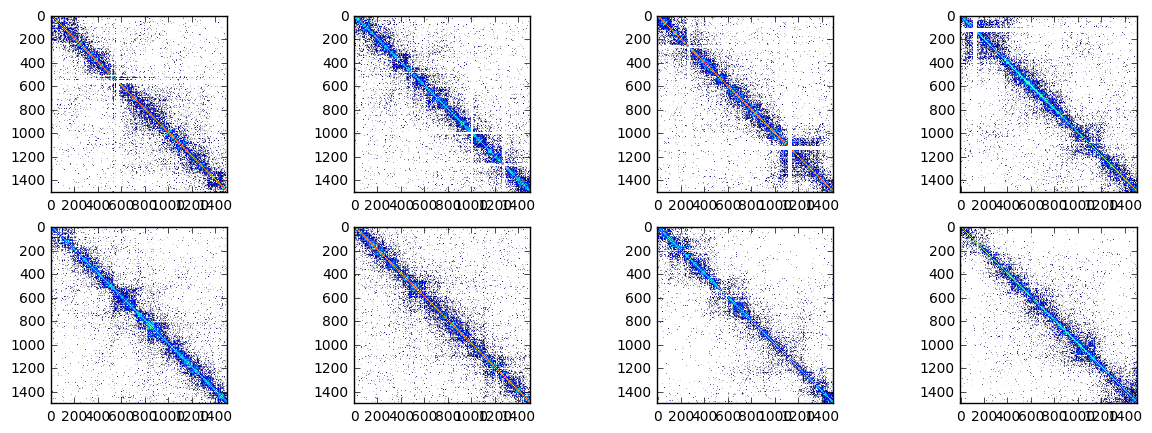

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
window_size = 1500
overlap_size = 500
start = 0
end = window_size
for k in range(8):
    axes.flat[k].imshow(large[start:end, start:end, ])
    print (start, end)
    start = end - overlap_size
    end = start + window_size
    
#     axes.flat[k].set_title(label[y_test[i+k]])
#     axes.flat[k+6].imshow(X_test[i+k])
#     axes.flat[k+6].set_title(label[y_test[i+k]])


#plt.imshow(large[start:end, start:end, ])

In [ ]:
X = np.loadtxt("../largeMatrices/GM12878_largeRegions_chr1_region0_DUP_Raw.txt")
large = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(large, aspect='auto')

<Container object of 1500 artists>

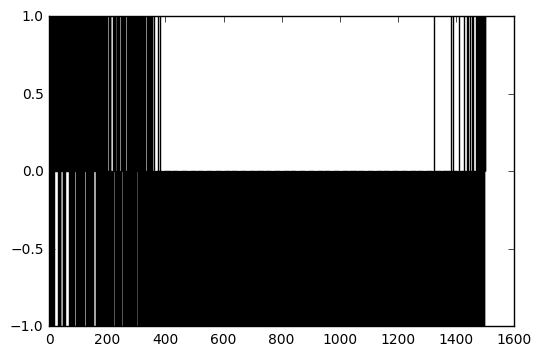

In [17]:
start = 4000
end = 5500
plt.bar(range(end-start), graph[start:end])

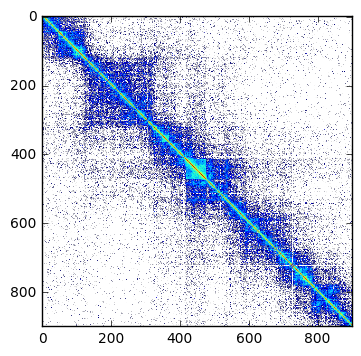

In [22]:
start = 4400
end = 5300
plt.imshow(large[start:end, start:end, ])

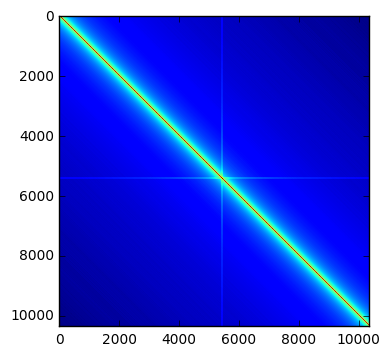

In [63]:
expected = np.log2(np.loadtxt("../largeMatrices/GM12878_largeRegions_chr1_region1_DUP_Expected.txt"))
plt.imshow(expected)

[ 80.91061563]
[[  7.48359525e-20   4.61125908e-04   4.29631715e-04 ...,   1.81200261e-05
    7.71983749e-06   2.78351788e-06]] 10362


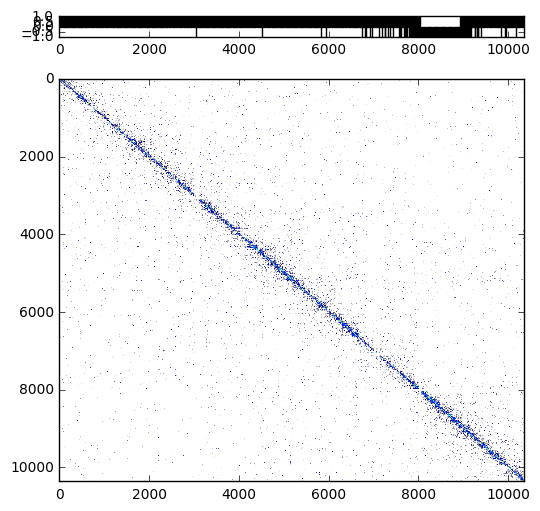

In [64]:
X = np.loadtxt("../largeMatrices/GM12878_largeRegions_chr1_region1_DUP_Raw.txt")
large = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(large, aspect='auto')

<Container object of 1500 artists>

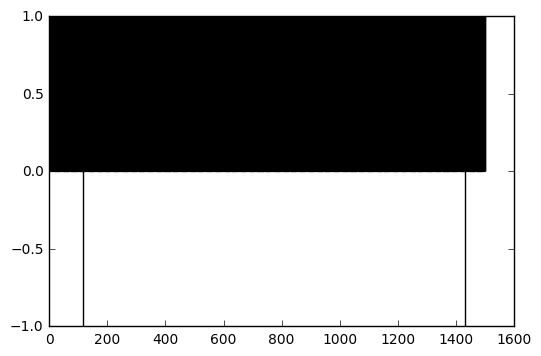

In [65]:
start = 4400
end = 5900
plt.bar(range(end-start), graph[start:end])

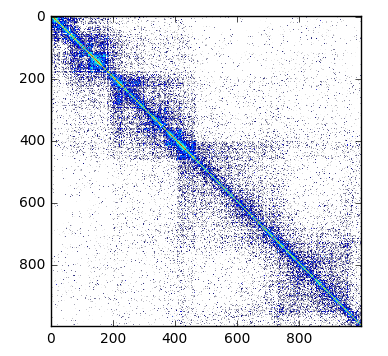

In [70]:
start = 5000
end = 6000
plt.imshow(large[start:end, start:end, ])

In [19]:
img.shape

(1, 3, 128, 128)

[[  1.42545660e-03   4.32155153e-04   7.72064598e-03   4.73404257e-03
    8.16182494e-01   1.69505104e-01]]
1/1 [==============================] - 0s
INV
(1024, 128, 128)


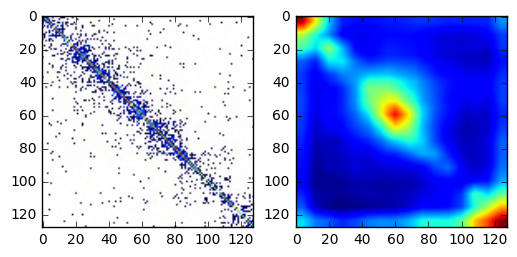

In [66]:
label = ["DEL", "DUP", "INSINV", "INS", "INV", "non-feature"]
###########################
# HOW TO SAVE IMAGE #
###########################
start = 4500
end = 5900

save_name = 'dup10000_test.jpg'
matplotlib.image.imsave(save_name, large[start:end, start:end, ])
test = plt.imread(save_name)
#################################



#test = test[start:end, start:end, ]

###########################
# CONVERT TO MODEL's CONDITIONED IMAGE #
###########################
test = Image.fromarray(test)
test = test.resize((128,128))
test = np.asarray(test)
test_norm = test.astype('float32')
test_norm /= 255.
img = np.asarray([test_norm]).transpose(0,3,1,2)
print model.predict(img)
print label[model.predict_classes(img)[0]]

# # visualize
fig, axes = plt.subplots(nrows=1, ncols=2)
axes.flat[0].imshow(test)

layers_extract = [22, 29]
hc = extract_hypercolumn(model, layers_extract, img)
print hc.shape
ave = np.average(hc.transpose(1, 2, 0), axis=2)
axes.flat[1].imshow(ave)

[ 80.95829665]
[[  7.45396214e-20   4.50662843e-04   4.27606073e-04 ...,   1.77443839e-05
    7.57989662e-06   2.72602626e-06]] 10358


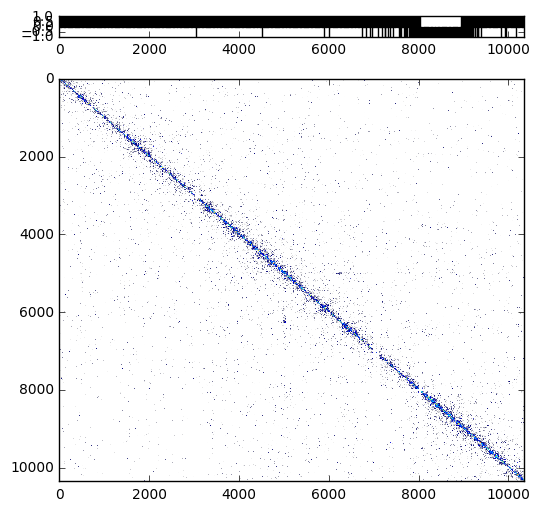

In [71]:
X = np.loadtxt("../largeMatrices/GM12878_largeRegions_chr1_region1_INS_Raw.txt")
large = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the first subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(large, aspect='auto')

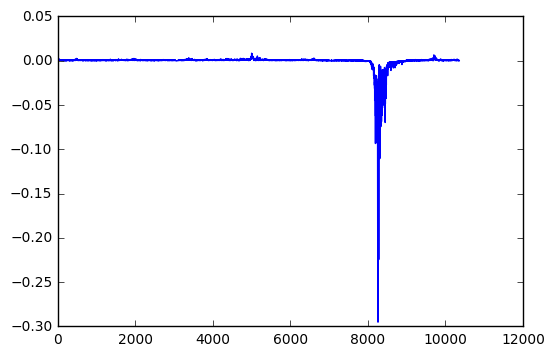

In [75]:
plt.plot(pca.components_[0])

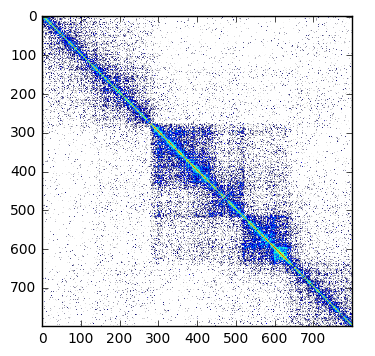

In [76]:
start = 6000
end = 6800
plt.imshow(large[start:end, start:end, ])

[[ 0.00964397  0.02942744  0.44627577  0.41884792  0.02286863  0.07293624]]
1/1 [==============================] - 0s
INSINV
(1024, 128, 128)


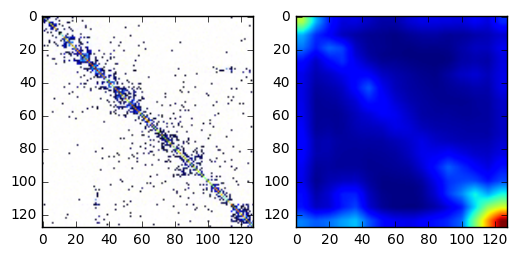

In [74]:
label = ["DEL", "DUP", "INSINV", "INS", "INV", "non-feature"]
###########################
# HOW TO SAVE IMAGE #
###########################
start = 4500
end = 6500

save_name = 'ins10000_test.jpg'
matplotlib.image.imsave(save_name, large[start:end, start:end, ])
test = plt.imread(save_name)
#################################



#test = test[start:end, start:end, ]

###########################
# CONVERT TO MODEL's CONDITIONED IMAGE #
###########################
test = Image.fromarray(test)
test = test.resize((128,128))
test = np.asarray(test)
test_norm = test.astype('float32')
test_norm /= 255.
img = np.asarray([test_norm]).transpose(0,3,1,2)
print model.predict(img)
print label[model.predict_classes(img)[0]]

# # visualize
fig, axes = plt.subplots(nrows=1, ncols=2)
axes.flat[0].imshow(test)

layers_extract = [22, 29]
hc = extract_hypercolumn(model, layers_extract, img)
print hc.shape
ave = np.average(hc.transpose(1, 2, 0), axis=2)
axes.flat[1].imshow(ave)

[[  3.60777747e-04   2.51353107e-04   1.83616605e-04   3.26160021e-04
    1.35107990e-03   9.97526944e-01]]
1/1 [==============================] - 0s
non-feature
(1024, 128, 128)


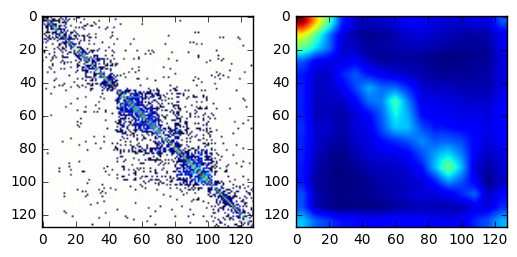

In [77]:
label = ["DEL", "DUP", "INSINV", "INS", "INV", "non-feature"]
###########################
# HOW TO SAVE IMAGE #
###########################
start = 6000
end = 6800

save_name = 'ins10000_test.jpg'
matplotlib.image.imsave(save_name, large[start:end, start:end, ])
test = plt.imread(save_name)
#################################



#test = test[start:end, start:end, ]

###########################
# CONVERT TO MODEL's CONDITIONED IMAGE #
###########################
test = Image.fromarray(test)
test = test.resize((128,128))
test = np.asarray(test)
test_norm = test.astype('float32')
test_norm /= 255.
img = np.asarray([test_norm]).transpose(0,3,1,2)
print model.predict(img)
print label[model.predict_classes(img)[0]]

# # visualize
fig, axes = plt.subplots(nrows=1, ncols=2)
axes.flat[0].imshow(test)

layers_extract = [22, 29]
hc = extract_hypercolumn(model, layers_extract, img)
print hc.shape
ave = np.average(hc.transpose(1, 2, 0), axis=2)
axes.flat[1].imshow(ave)

In [ ]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Normal distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_norm, bins=30, color='0.30')

# small subplot 1
plt.subplot2grid((3,3), (0,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('t distribution')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.hist(dist_tdis, bins=30, color='b')


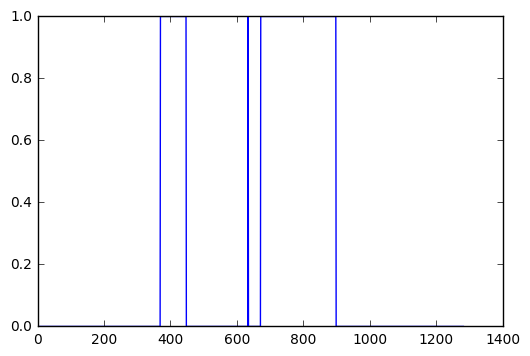

In [30]:
plt.plot(1.0*(pca.components_[0]>=0))

In [32]:
sum(pca.components_[0]>=0)

306

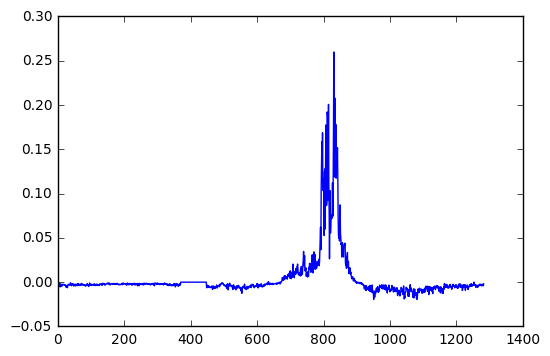

In [31]:
plt.plot(pca.components_[0])

(256, 256)


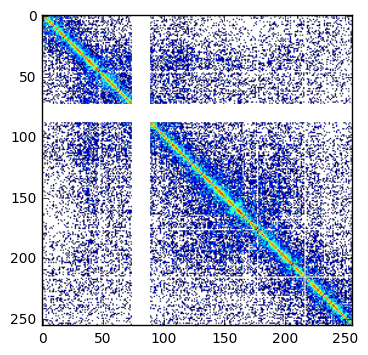

In [3]:
img = np.log2(np.loadtxt("/home/ec2-user/matrices/GM12878_chr10_region24_DEL_Raw.txt"))
print img.shape
plt.imshow(img)

In [3]:
# build the VGG16 network
import h5py
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
K.set_image_dim_ordering('th')

filter_size = 20
num_classes = 6
size = 128

weights_path = '../vgg16_weights.h5'

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(3,size,size)))

# model.add(Convolution2D(32, 20, 20, activation='relu', name='conv0_1'))
# model.add(ZeroPadding2D((1, 1)))
# model.add(Convolution2D(32, 20, 20, activation='relu', name='conv0_2'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# #model.add(Flatten(input_shape=(64,3,3,3)))

# model.add(ZeroPadding2D((1, 1), input_shape=(64,3,3,3)))

model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))



# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_classes, activation='softmax'))

# model.add(Flatten(input_shape=model.output_shape[1:]))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))


# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
#top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)


# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
# for layer in model.layers[:25]:
#     layer.trainable = False

    
model.summary()

Model loaded.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 130, 130)   0           zeropadding2d_input_1[0][0]      
____________________________________________________________________________________________________
conv1_1 (Convolution2D)          (None, 64, 128, 128)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 130, 130)  0           conv1_1[0][0]                    
____________________________________________________________________________________________________
conv1_2 (Convolution2D)          (None, 64, 128, 128)  36928       zeropadding2d_2[0][0]            
_____________________________________________________________________________

In [29]:
from random import shuffle

dir_path='../class6images_n2800_size128/'
X_data = []
y_data = []

for root, dirs, files in os.walk(dir_path, topdown=False):
    shuffle(files)  # shuffle so that we can distribute 6 classes evenly
    for name in files: # loo through all the files in /class6images/
        img = plt.imread(os.path.join(root, name))
        X_data.append(img)
        if "_DEL_" in name:
            y_data.append(0)
        elif "_DUP_" in name:
            y_data.append(1)
        elif "_INSINV_" in name:
            y_data.append(2)
        elif "_INS_" in name:
            y_data.append(3)
        elif "_INV_" in name:
            y_data.append(4)
        elif "_matrix" in name:
            y_data.append(5)

print len(X_data), len(y_data)
print "Input Reading Done."

16800 16800
Input Reading Done.


In [30]:
split = 15000 # Use 90% of dataset for Train
num_classes = 6

X = np.asarray(X_data)
#X = X.transpose(0,3,1,2)
print X.shape


X_train, X_test = X[:split], X[split:]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print X_train.shape, X_test.shape
print X_train[0].shape

y = np.asarray(y_data)
print y.shape


y_train, y_test = y[:split], y[split:]
print y_train.shape, y_test.shape
print type(y_test), y_test

# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print Y_train.shape

(16800, 128, 128, 3)
(15000, 128, 128, 3) (1800, 128, 128, 3)
(128, 128, 3)
(16800,)
(15000,) (1800,)
<type 'numpy.ndarray'> [1 1 5 ..., 0 2 4]
(15000, 6)


In [31]:
X_train_transpose = X_train.transpose(0,3,1,2)
X_test_transpose = X_test.transpose(0,3,1,2)
print X_train_transpose.shape, X_test_transpose.shape
print Y_train.shape

(15000, 3, 128, 128) (1800, 3, 128, 128)
(15000, 6)


In [11]:
model.load_weights("../6class_n2800_size128_95val_acc_all_trainable_lr001.hdf5")

In [7]:
model.load_weights("../6class_n2800_size128_95val_acc_all_trainable_lr001.hdf5")
# Compile model (required to make predictions)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print("Created model and loaded weights from file")

# 10. Evaluate model on test data
score = model.evaluate(X_test_transpose, Y_test, verbose=1)
score

Created model and loaded weights from file
1800/1800 [==============================] - 14s    


[0.05962730969396135, 0.98333333333333328]

In [33]:
label_index = 0
i = 0
list_for_one = []
while len(list_for_one) < 6:
    if y_train[i] == label_index:
        list_for_one.append(i)
        print y_train[i]
        label_index += 1
    i+=1
print list_for_one

0
1
2
3
4
5
[3, 4, 8, 18, 29, 30]


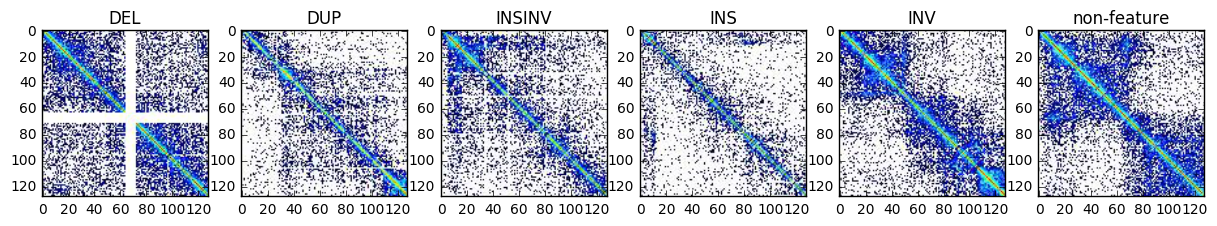

In [23]:
label = ["DEL", "DUP", "INSINV", "INS", "INV", "non-feature"]
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,5))
for k in range(6):
    axes.flat[k].imshow(X_train[list_for_one[k]])
    axes.flat[k].set_title(label[k])

In [7]:
predicted_classes = list(model.predict_classes(X_test_transpose))

1800/1800 [==============================] - 14s    


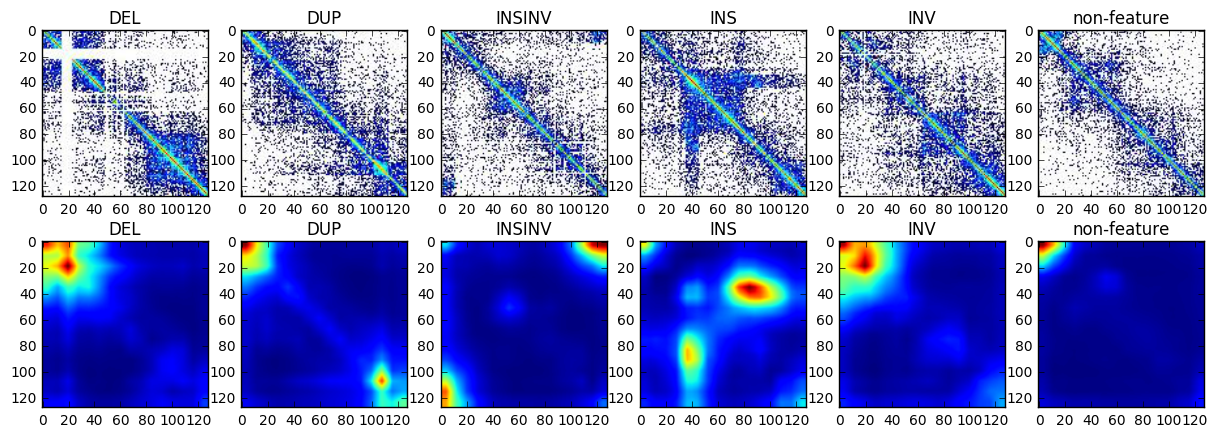

In [34]:
each_class_index = list_for_one
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15,5))
for k in range(6):
    axes.flat[k].imshow(X_train[each_class_index[k]])
    axes.flat[k].set_title(label[y_train[each_class_index[k]]])
    
layers_extract = [22, 29]
for k in range(6):
    im = np.asarray([X_train_transpose[each_class_index[k]]])
    hc = extract_hypercolumn(model, layers_extract, im)
    ave = np.average(hc.transpose(1, 2, 0), axis=2)
    axes.flat[k+6].imshow(ave)
    axes.flat[k+6].set_title(label[y_train[each_class_index[k]]])

In [37]:
7%6

1

In [39]:
label_index = 0
i = 0
list_for_multiple = []
while len(list_for_multiple) < 6*5:
    if y_train[i] == label_index:
        list_for_multiple.append(i)
#        print y_train[i]
        label_index += 1
        label_index = label_index % 6
    i+=1
print list_for_multiple

[3, 4, 8, 18, 29, 30, 35, 37, 41, 43, 45, 56, 64, 71, 72, 86, 89, 91, 93, 95, 96, 98, 99, 102, 104, 111, 120, 127, 128, 143]


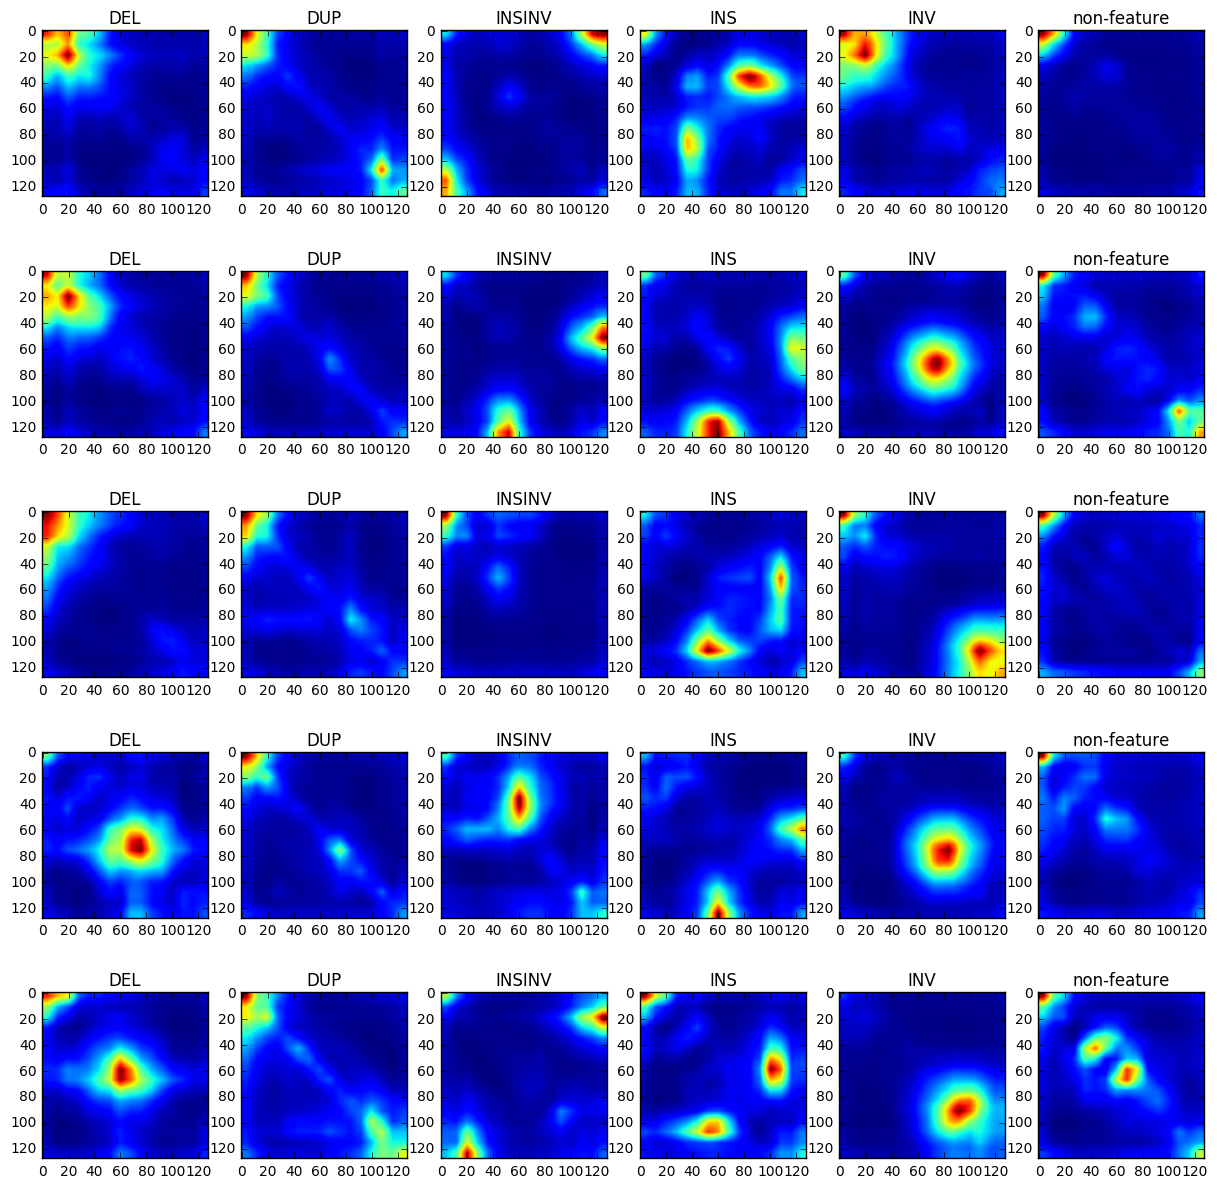

In [42]:
each_class_index = list_for_multiple
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15,15))
# for k in range(6):
#     axes.flat[k].imshow(X_train[each_class_index[k]])
#     axes.flat[k].set_title(label[y_train[each_class_index[k]]])
    
layers_extract = [22, 29]
for k in range(6*5):
    im = np.asarray([X_train_transpose[each_class_index[k]]])
    hc = extract_hypercolumn(model, layers_extract, im)
    ave = np.average(hc.transpose(1, 2, 0), axis=2)
    axes.flat[k].imshow(ave)
    axes.flat[k].set_title(label[y_train[each_class_index[k]]])

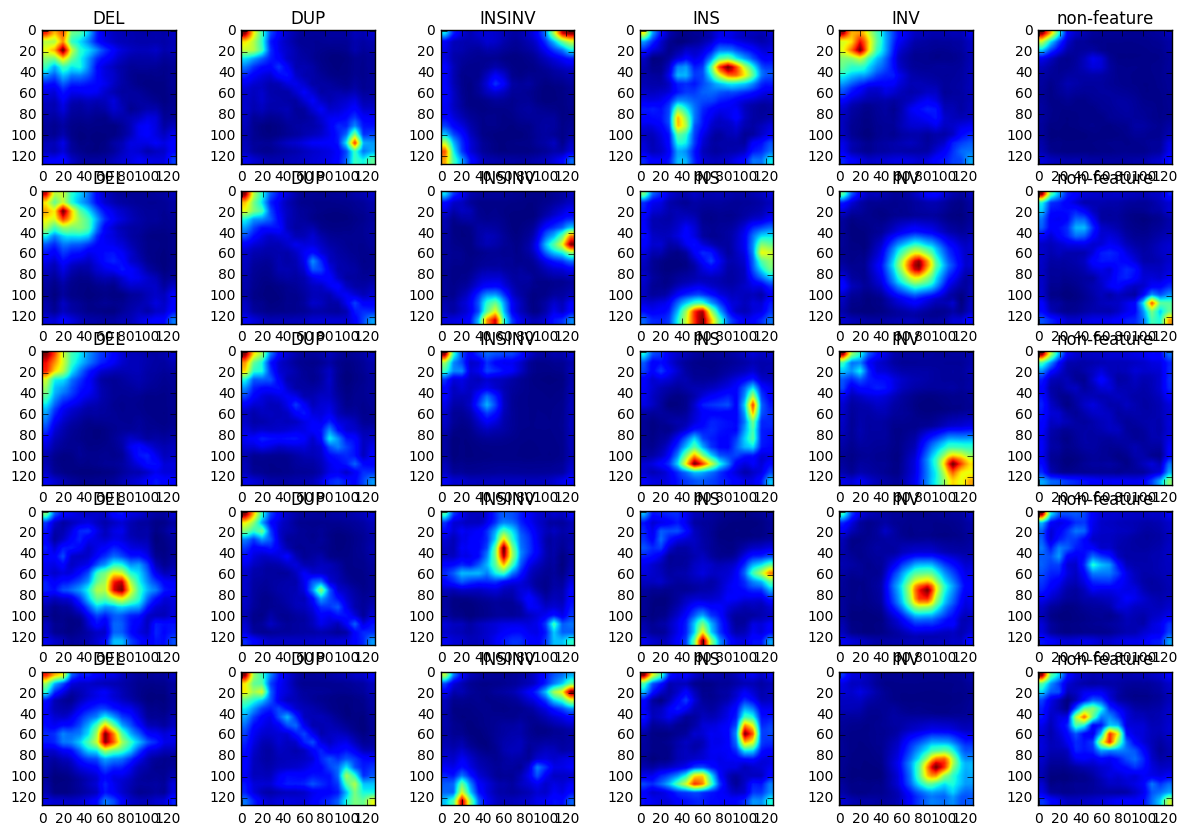

In [43]:
each_class_index = list_for_multiple
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15,10))
# for k in range(6):
#     axes.flat[k].imshow(X_train[each_class_index[k]])
#     axes.flat[k].set_title(label[y_train[each_class_index[k]]])
    
layers_extract = [22, 29]
for k in range(6*5):
    im = np.asarray([X_train_transpose[each_class_index[k]]])
    hc = extract_hypercolumn(model, layers_extract, im)
    ave = np.average(hc.transpose(1, 2, 0), axis=2)
    axes.flat[k].imshow(ave)
    axes.flat[k].set_title(label[y_train[each_class_index[k]]])

In [9]:
true_classes = list(y_test)

confusion_dict = {'0':[0,0,0,0,0,0],
                      '1':[0,0,0,0,0,0],
                      '2':[0,0,0,0,0,0],
                      '3':[0,0,0,0,0,0],
                      '4':[0,0,0,0,0,0],
                      '5':[0,0,0,0,0,0]}

for i in range(len(true_classes)):
    y = true_classes[i]
    x = predicted_classes[i]
    confusion_dict[str(y)][x] += 1
    
print confusion_dict

{'1': [0, 295, 0, 0, 0, 0], '0': [303, 0, 0, 0, 1, 0], '3': [1, 0, 2, 326, 0, 3], '2': [1, 0, 283, 3, 1, 2], '5': [0, 0, 0, 0, 0, 285], '4': [0, 0, 0, 0, 291, 3]}


In [15]:
cm = np.vstack((np.array(confusion_dict['0']),
                np.array(confusion_dict['1']),
                np.array(confusion_dict['2']),
                np.array(confusion_dict['3']),
                np.array(confusion_dict['4']),
                np.array(confusion_dict['5'])))
print cm

[[303   0   0   0   1   0]
 [  0 295   0   0   0   0]
 [  1   0 283   3   1   2]
 [  1   0   2 326   0   3]
 [  0   0   0   0 291   3]
 [  0   0   0   0   0 285]]


Normalized confusion matrix
[[ 1.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.98  0.01  0.    0.01]
 [ 0.    0.    0.01  0.98  0.    0.01]
 [ 0.    0.    0.    0.    0.99  0.01]
 [ 0.    0.    0.    0.    0.    1.  ]]


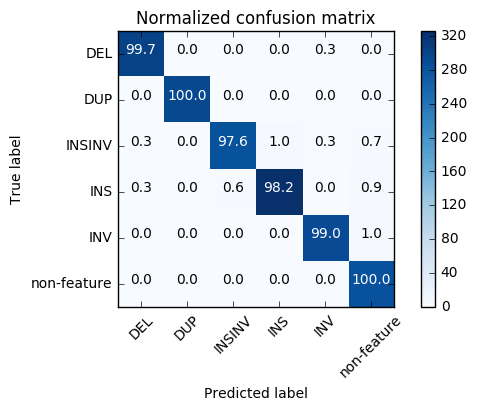

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]*100, '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cm, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
label = ["DEL", "DUP", "INSINV", "INS", "INV", "non-feature"]
plt.figure()
plot_confusion_matrix(cm, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
def extract_hypercolumn(model, layer_indexes, instance):
    layers = [model.layers[li].output for li in layer_indexes]
    get_feature = theano.function([model.layers[0].input], layers,
                                  allow_input_downcast=False)
    feature_maps = get_feature(instance)
    hypercolumns = []
    #print len(feature_maps), feature_maps[0].shape
    for convmap in feature_maps:
        for fmap in convmap[0]:
            upscaled = sp.misc.imresize(fmap, size=(128, 128),
                                        mode="F", interp='bilinear')
            hypercolumns.append(upscaled)

    return np.asarray(hypercolumns)

[ 652.76329712]
[[  2.97608904e-19   3.15231744e-03   3.01996486e-03 ...,   3.22533043e-04
    1.04192902e-04   3.15303148e-04]] 1449


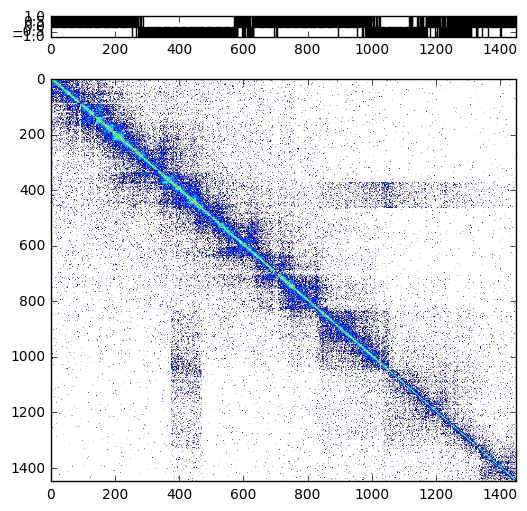

In [50]:
X = np.loadtxt("../size1500_matrix_for_eigen/GM12878_chr11_region1_INS_Raw.txt")
img = np.log2(X)
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_
print pca.components_, len(pca.components_[0])

fig = plt.figure(figsize=(6, 6)) # (w, h)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 20]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)
graph = 1.0*(pca.components_[0]>0) + -1.0*(pca.components_[0]<0)
ax0.bar(range(len(graph)),graph)
ax1.imshow(img, aspect='auto')

[[  1.43523482e-06   1.07542530e-06   1.65958330e-01   8.34016740e-01
    6.89824901e-07   2.16920671e-05]]
1/1 [==============================] - 0s
INS
(1024, 128, 128)


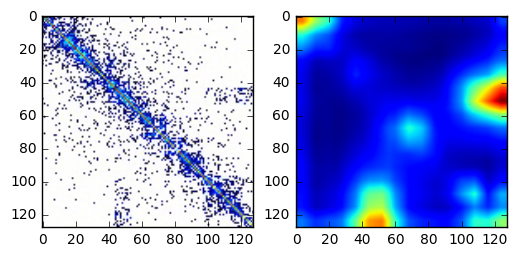

In [73]:
label = ["DEL", "DUP", "INSINV", "INS", "INV", "non-feature"]
###########################
# HOW TO SAVE IMAGE #
###########################
save_name = 'ins1500_test.jpg'
#matplotlib.image.imsave(save_name, img)
test = plt.imread(save_name)
#################################


start = 0
end = 1100
test = test[start:end, start:end, ]

###########################
# CONVERT TO MODEL's CONDITIONED IMAGE #
###########################
test = Image.fromarray(test)
test = test.resize((128,128))
test = np.asarray(test)
test_norm = test.astype('float32')
test_norm /= 255.
img = np.asarray([test_norm]).transpose(0,3,1,2)
print model.predict(img)
print label[model.predict_classes(img)[0]]

# # visualize
fig, axes = plt.subplots(nrows=1, ncols=2)
axes.flat[0].imshow(test)

layers_extract = [22, 29]
hc = extract_hypercolumn(model, layers_extract, img)
print hc.shape
ave = np.average(hc.transpose(1, 2, 0), axis=2)
axes.flat[1].imshow(ave)

[[  4.07111003e-07   9.29252693e-08   1.81397819e-03   9.98158276e-01
    1.21325542e-07   2.71141125e-05]]
1/1 [==============================] - 0s
INS
(1024, 128, 128)


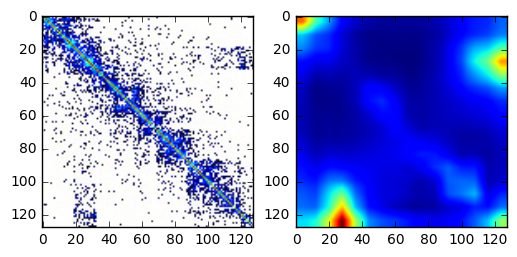

In [72]:
save_name = 'ins1500_test.jpg'
test = plt.imread(save_name)

start = 250
end = 1100
test = test[start:end, start:end, ]

###########################
# CONVERT TO MODEL's CONDITIONED IMAGE #
###########################
test = Image.fromarray(test)
test = test.resize((128,128))
test = np.asarray(test)
test_norm = test.astype('float32')
test_norm /= 255.
img = np.asarray([test_norm]).transpose(0,3,1,2)
print model.predict(img)
print label[model.predict_classes(img)[0]]

# # visualize
fig, axes = plt.subplots(nrows=1, ncols=2)
axes.flat[0].imshow(test)

layers_extract = [22, 29]
hc = extract_hypercolumn(model, layers_extract, img)
print hc.shape
ave = np.average(hc.transpose(1, 2, 0), axis=2)
axes.flat[1].imshow(ave)